# Calculs et tests sur les valeurs de champ magnétique stellaires prédit et connus.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astroquery.simbad import Simbad
from astroquery.vizier import Vizier

from star import Star

In [2]:
config = pd.read_csv("parametres.csv", delimiter=';')
int(config.value[1])

1

In [3]:
coeffs_polyfit = { 'B1' : [5.9252252,-46.444525,218.10474,-481.21961,520.51852,-271.33952,54.7305532],
                    'B4' : [290242.68,-321299.4,133345.3,-24588.728,1699.7549],
                    'B6' : [5.707718,-28.489377,120.03282,-247.65387,255.10662,-128.3299,25.233201]}

In [4]:
catalog_Bstar = pd.read_csv('crossmatch_mag_exo.csv', delimiter=',')

catalog_Bstar.keys()

Index(['Unnamed: 0', 'Name', 'Simbad_ID', 'B_G', 'ΔB_G', 'Tag', 'Bdescription',
       'Year', 'Month', 'Article', 'Limit', 'SpecType', 'V_mag', 'B-V',
       'B_mag', 'vsini_kms', 'Bestim_G', 'Mass_Ms', 'Radius_Rs', 'Age_Gy',
       'Teff_K', 'period_s', 'esti_rotation_s-1'],
      dtype='object')

In [5]:
from astroquery.simbad import Simbad

def get_spectral_type(star_name):
    # Configure Simbad to display the spectral type
    custom_simbad = Simbad()
    custom_simbad.add_votable_fields('sptype')

    # Query Simbad for the star
    result_table = custom_simbad.query_object(star_name)

    # Check if the result is not empty and contains the spectral type
    if result_table is not None and 'SP_TYPE' in result_table.colnames:
        spectral_type = result_table['SP_TYPE'][0]
        if spectral_type:
            return spectral_type
        else:
            return f"No spectral type found for {star_name}"
    else:
        return f"No data found for {star_name}"

# Example usage
star_name = 'Qatar 2'  # You can replace this with any star name
spectral_type = get_spectral_type(star_name)
print(f"The spectral type of {star_name} is: {spectral_type}")

The spectral type of Qatar 2 is: K5V


In [6]:
type_cat = np.array(catalog_Bstar['SpecType'],dtype='str')
Teff_cat = np.array(catalog_Bstar['Teff_K'],dtype='float')
B_cat = np.array(catalog_Bstar['Bestim_G'],dtype='float')
M_cat = np.array(catalog_Bstar['Mass_Ms'],dtype='float')
R_cat = np.array(catalog_Bstar['Radius_Rs'],dtype='float')
age_cat = np.array(catalog_Bstar['Age_Gy'],dtype='float')
P_cat = np.array(catalog_Bstar['period_s'],dtype='float') / (3600*24) #jours

- Plot $L_* = f(M_*)$

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(star_mass, star_luminosity, color='tab:red', marker='x', label='Prediction')
plt.xlabel('$M_*$ [$M_{Sun}$]',fontsize = 18)
plt.ylabel('$L_*$ [$L_{Sun}$]',fontsize = 18)
#plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend()
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Lstar_vs_Mstar.png',  transparent=True, bbox_inches='tight',dpi=150 )

NameError: name 'star_mass' is not defined

<Figure size 720x504 with 0 Axes>

- Plot $B_* = f(M_*)$

In [8]:
def fit_B_M(M):
    B1 = 0
    for i,coeff in enumerate(coeffs_polyfit['B1']):
        B1 += coeff * (M**i)
    B1 = 10**B1

    return B1

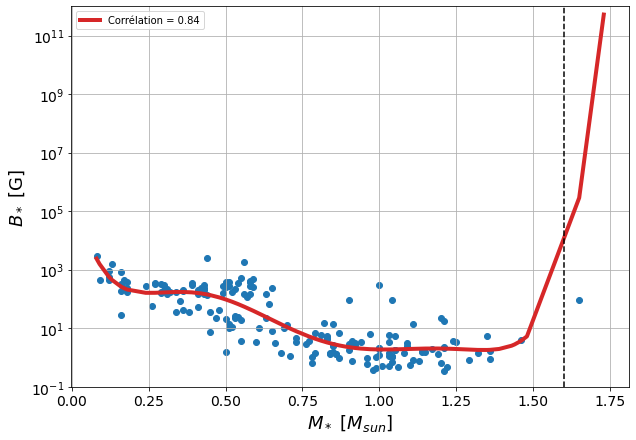

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(M_cat, B_cat, color='tab:blue')
plt.plot(np.sort(M_cat), fit_B_M(M_cat)[np.argsort(M_cat)], color='tab:red', linewidth=4, label='Corrélation = 0.84')
plt.vlines(1.6,ymin=0.1,ymax=1e12, color='black', linestyle='dashed')
plt.xlabel('$M_*$ [$M_{sun}$]',fontsize = 18)
plt.ylabel('$B_*$ [G]',fontsize = 18)
plt.ylim(0.1,1e12)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend()
#plt.savefig('/Users/emauduit/Documents/These/target_selection/Etudes/B_star/Bstar_vs_Mstar.png', dpi=150 )
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Bstar_Mstar.png', transparent=True, bbox_inches='tight', dpi=150 )
plt.savefig('/Users/emauduit/Documents/These/Articles/Target selection - A&A paper/fig/plot_Bstar_Mstar.png', transparent=True, bbox_inches='tight', dpi=150 )

- Plot $B_* = f(T_{eff})$

In [10]:
def fit_B_Teff(Teff):
    T = np.log10(Teff)
    B4 = 0
    for i,coeff in enumerate(coeffs_polyfit['B4']):
        B4 += coeff * (T**i)
    B4 = 10**B4

    return B4

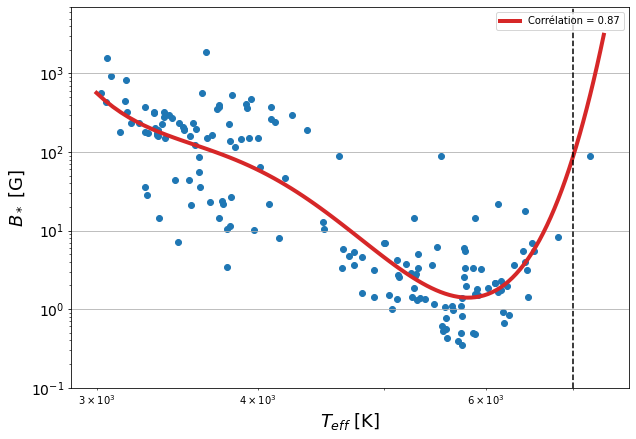

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(Teff_cat, B_cat, marker = 'o',color='tab:blue')#, label='$B_{mes}$')
plt.plot(np.linspace(3e3,7.4e3,100), fit_B_Teff(np.linspace(3e3,7.4e3,100)), color='tab:red', linewidth=4, label='Corrélation = 0.87')
plt.vlines(7e3,ymin=0.1,ymax=7e3, color='black', linestyle='dashed')
plt.xlabel('$T_{eff}$ [K]',fontsize = 18)
plt.ylabel('$B_*$ [G]',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,7e3)
plt.grid()
plt.legend()
#plt.savefig('/Users/emauduit/Documents/These/target_selection/Etudes/B_star/Bstar_vs_Teff.png', dpi=150 )
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Bstar_Teff.png',  transparent=True, bbox_inches='tight',dpi=150 )
plt.savefig('/Users/emauduit/Documents/These/Articles/Target selection - A&A paper/fig/plot_Bstar_Teff.png', transparent=True, bbox_inches='tight', dpi=150 )

BED: equatorial dipolar magnetic field
BET: total equatorial magnetic field (as opposed to only dipolar component)
BLON: longitudinal magnetic field
BPOL: pole dipolar magnetic field
BDM: mean dipolar magnetic field
BMEAN: mean magnetic field
BDEEP: magnetic field at the deeper atmospheric layer
BUNK: B at unknown location on the star

- Plot $B_{est} = f(M_*,P_*)$

In [12]:
def fit_BP_M(M):
    B6 = 0
    for i,coeff in enumerate(coeffs_polyfit['B6']):
        B6 += coeff * (M**i)
    B6 = 10**B6
    return B6

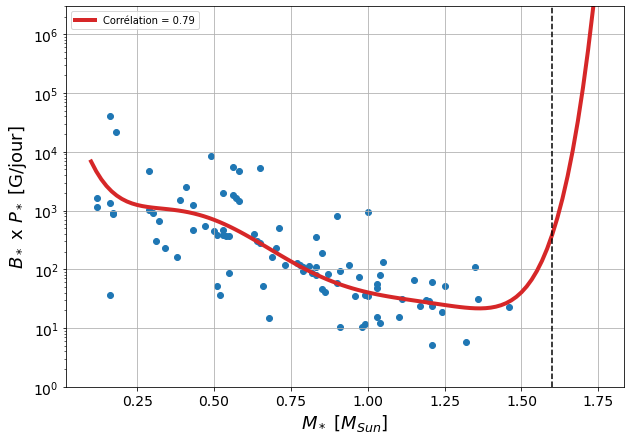

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(M_cat, B_cat * P_cat,marker='o', color='tab:blue')#, label='$B_{mes}$')
plt.plot(np.linspace(0.1,1.75,100), fit_BP_M(np.linspace(0.1,1.75,100)), color='tab:red',linewidth=4, label='Corrélation = 0.79')
plt.vlines(1.6,ymin=1,ymax=3e6, color='black', linestyle='dashed')
plt.xlabel('$M_*$ [$M_{Sun}$]',fontsize = 18)
plt.ylabel('$B_*$ x $P_*$ [G/jour]',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.ylim(1,3e6)
plt.grid()
plt.legend()
#plt.savefig('/Users/emauduit/Documents/These/target_selection/Etudes/B_star/Bstar_vs_MstarPstar.png', dpi=150 )
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Bstar_Mstar_Pstar.png',  transparent=True, bbox_inches='tight',dpi=150 )
plt.savefig('/Users/emauduit/Documents/These/Articles/Target selection - A&A paper/fig/plot_Bstar_Mstar_Pstar.png', transparent=True, bbox_inches='tight', dpi=150 )

In [14]:
data = pd.read_csv(r'/Users/emauduit/Documents/These/target_selection/Runs/2024-06-28T18h53/main_output.csv',delimiter=';')
data.keys()

Index(['name', 'planet_mass', 'planet_radius', 'planet_luminosity',
       'star_planet_distance', 'planet_rotation_rate', 'planet_orbital_period',
       'star_simbad_id', 'star_mass', 'star_radius', 'star_age',
       'earth_distance', 'star_magfield', 'star_rotperiod', 'star_luminosity',
       'spectral_type', 'spectral_type_code', 'star_effective_temp',
       'dynamo_density', 'dynamo_radius', 'B_dyn', 'B_eq', 'magnetic_moment',
       'standoff_distance', 'sw_density', 'sw_velocity', 'coronal_temperature',
       'sw_magfield', 'alfven_velocity', 'magnetic_field_planet',
       'freq_max_planet', 'pow_emission_kinetic', 'pow_emission_magnetic',
       'pow_emission_spi', 'flux_kinetic_au', 'flux_magnetic_au',
       'flux_spi_au', 'pow_received_kinetic', 'pow_received_magnetic',
       'pow_received_spi', 'freq_max_star'],
      dtype='object')

In [15]:
star_period=np.array(data['star_rotperiod'][1:],dtype='float')
star_mass = np.array(data['star_mass'][1:],dtype='float')
star_radius = np.array(data['star_radius'][1:], dtype='float')
star_luminosity = np.array(data['star_luminosity'][1:], dtype='float')
star_name = np.array(data['star_simbad_id'][1:], dtype='str')
star_teff = np.array(data['star_effective_temp'][1:], dtype='float')

- Plot $T_{eff} = f(R_*)$

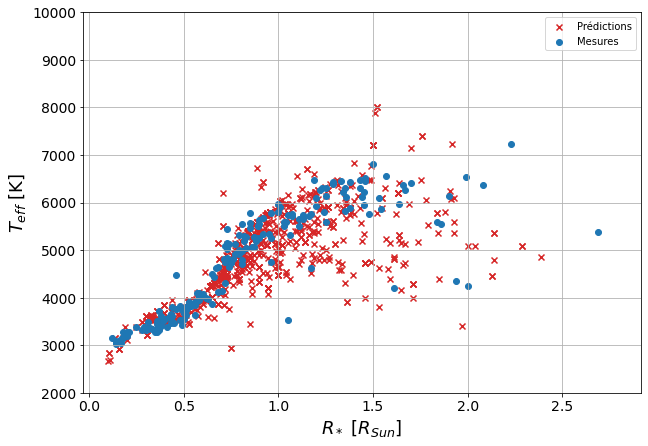

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(star_radius,star_teff, color='tab:red', marker='x',label='Prédictions')
plt.scatter(R_cat,Teff_cat, color='tab:blue', marker='o', label='Mesures')
plt.xlabel('$R_*$ [$R_{Sun}$]',fontsize = 18)
plt.ylabel('$T_{eff}$ [K]',fontsize = 18)
plt.ylim(2e3,1e4)
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend()
plt.savefig('/Users/emauduit/Documents/These/Articles/Target selection - A&A paper/fig/plot_Teff_Rstar.png', transparent=True, bbox_inches='tight', dpi=150 )
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Teff_vs_Rstar.png',transparent=True, bbox_inches='tight', dpi=150 )

In [17]:
def luminosity(value : float):
    a = 0.39704170
    b = 8.52762600
    c = 0.00025546
    d = 5.43288900
    e = 5.56357900
    f = 0.78866060
    g = 0.00586685
    M = value
    res1 = a * pow(M, 5.5) + b * pow(M, 11)
    res2 = (
        c
        + pow(M, 3)
        + d * pow(M, 5)
        + e * pow(M, 7)
        + f * pow(M, 8)
        + g * pow(M, 9.5)
    )
    return res1 / res2

def compute_effective_temperature(L, R):
    """ Effective temperature of the star, computed with the Stefan-Boltzman law."""
    LS = 3.826e26  # W
    RS = 6.96342e8  # m
    sigma_sb = 5.670374e-8 # W.m-2.K-4
    return np.power(L*LS/(4*np.pi*sigma_sb* ((R*RS)**2)),1/4)

def compute_rotperiod(age):
    """Define the rotational period of the star in days."""
    tau = 2.56e7  # yr
    K = 0.6709505359255223
    rotperiod = K * pow(1 + (age / tau), 0.7)
    return rotperiod

def compute_B_sp_type(values):
    res = np.zeros_like(values,dtype='float')
    sptype_dict = {'D': 374, 'M':120.4,'K':6.53,'G':1.32,'F':2.68}
    for i,sptype in enumerate(values) :
        for letter,B in sptype_dict.items():
            if letter in sptype :
                res[i] = B
    return res


In [18]:
sptype_dict = {'D': 374, 'M':120.4,'K':6.53,'G':1.32,'F':2.68}
sp_type_err = np.array([[184,526],[95.4,379.6],[5.53,23.47],[0.8,5.7],[1.68,4.32]])
L_est = luminosity(M_cat)
age_est=np.where(np.isnan(age_cat),5.2,age_cat)
T_est = np.where(np.isnan(Teff_cat),compute_effective_temperature(L_est,R_cat),Teff_cat)
P_est = np.where(np.isnan(P_cat),compute_rotperiod(age_est),P_cat)
B_est1 = fit_B_M(M_cat)
B_est2 = fit_B_Teff(T_est)
B_est3 = fit_BP_M(M_cat)/P_est
B_est4 = np.sqrt(fit_B_Teff(T_est)*fit_BP_M(M_cat)/P_est)
B_est_sp_type= compute_B_sp_type(type_cat)

In [26]:
type(B_est_sp_type[1])

numpy.float64

In [27]:
correl_B_old = (np.nanmean(B_est_old*B_cat) - np.nanmean(B_est_old)*np.nanmean(B_cat)) / (np.nanstd(B_est_old) * np.nanstd(B_cat))
print(correl_B_old)

NameError: name 'B_est_old' is not defined

In [51]:
sp_type_err.T[1,0]

526.0

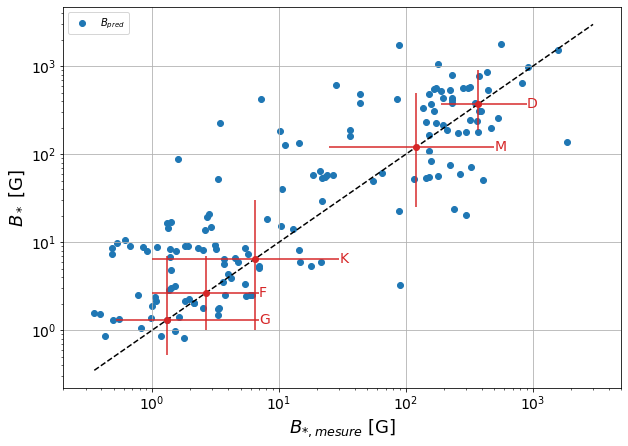

In [19]:
plt.figure(figsize=(10,7))
plt.plot(np.sort(B_cat), np.sort(B_cat), color='black', linestyle='dashed')
#plt.scatter(B_cat,B_est1, color='tab:orange', marker='v', label='$B_{est,1}$')
#plt.scatter(B_cat, B_est2, color='tab:red', marker ='^', label='$B_{est,2}$')
#plt.scatter(B_cat, B_est3, color='tab:green', marker ='x', label='$B_{est,3}$')
plt.scatter(B_cat, B_est4, color='tab:blue', marker ='o', label='$B_{pred}$')
plt.errorbar(sptype_dict.values(),sptype_dict.values(),xerr=sp_type_err.T,yerr=sp_type_err.T, color='tab:red', fmt='o')
i=0
for letter,B in sptype_dict.items():
    #plt.hlines(B, xmin=0.2, xmax= 5000, color='navy', linestyles='dotted')
    #plt.scatter(B,B, color='tab:red')
    plt.text(B + sp_type_err.T[1,i],B*0.9, letter, fontsize=14, color='tab:red')
    #plt.text(4000,B*1.1, letter, fontsize=14, color='navy')
    i+=1
plt.xlabel('$B_{*,mesure}$ [G]',fontsize = 18)
plt.ylabel('$B_*$ [G]',fontsize = 18)
plt.xlim(0.2,5000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.savefig('/Users/emauduit/Documents/These/Articles/Target selection - A&A paper/fig/plot_Bpred_Bmes.png', transparent=True, bbox_inches='tight', dpi=150 )
#plt.savefig('/Users/emauduit/Documents/These/target_selection/Etudes/B_star/Best_vs_Bmes_2.png', dpi=150, transparent = True )
#plt.savefig('/Users/emauduit/Documents/These/phd-manuscript/ch3/fig/plot_Bpred_Bmes.png',transparent=True, bbox_inches='tight', dpi=150 )

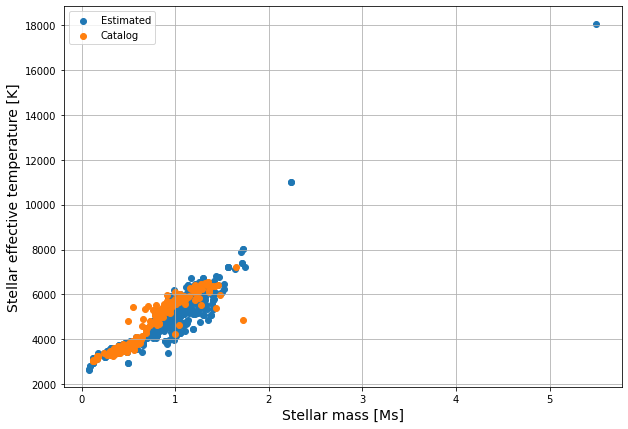

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(star_mass,star_teff, label='Estimated')
plt.scatter(catalog_Bstar['Mass_Ms'],Teff_cat, label='Catalog')
plt.xlabel('Stellar mass [Ms]',fontsize = 14)
plt.ylabel('Stellar effective temperature [K]',fontsize = 14)
plt.grid()
plt.legend()
plt.savefig('/Users/emauduit/Documents/These/target_selection/Etudes/B_star/Teff_vs_M.png', dpi=150 )

In [ ]:
B_predicted = np.array(data['star_magfield'][1:],dtype='float')
B_measured = catalog_Bstar['Bestim_G']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt 

In [ ]:
plt.figure()
plt.scatter(star_mass,B_predicted, color='tab:blue',label='predictions')
plt.scatter(catalog_Bstar['Mass_Ms'],B_measured, color='tab:red',label='observations')
#plt.xlabel('Period [days]')
plt.xlabel('Mass[Msun]')
plt.ylabel('Magnetic field [G]')
#plt.ylim(0.1,1e7)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


In [9]:
mass = 0.62
#Teff = 1432
Teff = compute_effective_temperature(luminosity(mass),0.576945784919304)
rotperiod = 27.7726833477206

coeffs_polyfit = { 'B1' : [5.9252252,-46.444525,218.10474,-481.21961,520.51852,-271.33952,54.7305532],
                    'B4' : [290242.68,-321299.4,133345.3,-24588.728,1699.7549],
                    'B6' : [5.707718,-28.489377,120.03282,-247.65387,255.10662,-128.3299,25.233201]}
B4 = 0 ; B6 = 0
T = np.log10(Teff)
print(T)
for i,coeff in enumerate(coeffs_polyfit['B4']):
    B4 += coeff * (T**i)
print(B4)
B4 = 10**B4
print(B4)
for i,coeff in enumerate(coeffs_polyfit['B6']):
    B6 += coeff * (mass**i)
print(B6)
B6 = (10**B6) / rotperiod
print(B6)
magfield = np.sqrt(B4*B6)


3.6019807050414436
1.7711865526507609
59.04546574831926
2.534008357693943
12.313755190695156


In [ ]:
data['star_simbad_id'][1:]

To do :

regarder l'évolution de Teff, Ro (cf Noraz 2024), M, t pour le champ magnétique avec les valeur dans la base de Corentin, voir si on peut faire un fit 